The purpose of this script is to compare the prescribed circle simulation results to a reference solution.
-F. Wendt (May 2019)

In [1]:
import pandas as pd
import numpy as np

#Read the reference data
ref_data=pd.read_csv('KiteFast_1112d13.out',skiprows=[1,2,3,4,5,7],delim_whitespace=True)
ref_data_np=ref_data.values
#ref_data

In [2]:
#Read the new simulation data
new_data=pd.read_csv('KiteFast.out',skiprows=[1,2,3,4,5,7],delim_whitespace=True)
new_data_np=new_data.values
#new_data

In [3]:
#compare max, min, mean and standard deviation for each channel 

#find the 12s index of the new data (we only have 12s of referene data)
end_ind_new=np.nonzero(new_data_np[:,0]==12.0)

#identify the number of columns
no_of_cols=np.size(new_data_np,1)

std_vector_old=np.zeros((no_of_cols,))
mean_vector_old=np.zeros((no_of_cols,))
min_vector_old=np.zeros((no_of_cols,))
max_vector_old=np.zeros((no_of_cols,))

std_vector_new=np.zeros((no_of_cols,))
mean_vector_new=np.zeros((no_of_cols,))
min_vector_new=np.zeros((no_of_cols,))
max_vector_new=np.zeros((no_of_cols,))


for row_c in range(no_of_cols):
    std_vector_old[row_c]=np.std(ref_data_np[:,row_c])
    mean_vector_old[row_c]=np.mean(ref_data_np[:,row_c])
    min_vector_old[row_c]=np.amin(ref_data_np[:,row_c])
    max_vector_old[row_c]=np.amax(ref_data_np[:,row_c])

    std_vector_new[row_c]=np.std(new_data_np[0:int(end_ind_new[0])+2,row_c])
    mean_vector_new[row_c]=np.mean(new_data_np[0:int(end_ind_new[0])+2,row_c])
    min_vector_new[row_c]=np.amin(new_data_np[0:int(end_ind_new[0])+2,row_c])
    max_vector_new[row_c]=np.amax(new_data_np[0:int(end_ind_new[0])+2,row_c])
    


In [4]:
#Calculate and print the absolute differences in terms of standard deviation
pd.set_option('display.max_columns', None) 
std_data_frame=ref_data.copy()
std_data_frame=std_data_frame.drop(std_data_frame.index[1:], axis=0)
std_data_frame.loc[len(std_data_frame)-1]=std_vector_old-std_vector_new
std_data_frame
#ABSOLUTE DELTA FOR STD:

,Time,Fus1TDx,Fus1TDy,Fus1TDz,Fus1RDx,Fus1RDy,Fus1RDz,SWn1TDx,SWn1TDy,SWn1TDz,SWn1RDx,SWn1RDy,SWn1RDz,PWn1TDx,PWn1TDy,PWn1TDz,PWn1RDx,PWn1RDy,PWn1RDz,VS1TDx,VS1TDy,VS1TDz,VS1RDx,VS1RDy,VS1RDz,SHS1TDx,SHS1TDy,SHS1TDz,SHS1RDx,SHS1RDy,SHS1RDz,PHS1TDx,PHS1TDy,PHS1TDz,PHS1RDx,PHS1RDy,PHS1RDz,SP1TRtSpd,SP1BRtSpd,PP1TRtSpd,PP1BRtSpd,KitePxi,KitePyi,KitePzi,KiteRoll,KitePitch,KiteYaw,KiteFxi,KiteFyi,KiteFzi,KiteMxi,KiteMyi,KiteMzi,Fus1Vrel,Fus2Vrel,Fus3Vrel,Fus4Vrel,Fus5Vrel,Fus6Vrel,Fus7Vrel,Fus8Vrel,Fus9Vrel,Fus1VAmbn,Fus2VAmbn,Fus3VAmbn,Fus4VAmbn,Fus5VAmbn,Fus6VAmbn,Fus7VAmbn,Fus8VAmbn,Fus9VAmbn,Fus1VAmbc,Fus2VAmbc,Fus3VAmbc,Fus4VAmbc,Fus5VAmbc,Fus6VAmbc,Fus7VAmbc,Fus8VAmbc,Fus9VAmbc,Fus1VAmbs,Fus2VAmbs,Fus3VAmbs,Fus4VAmbs,Fus5VAmbs,Fus6VAmbs,Fus7VAmbs,Fus8VAmbs,Fus9VAmbs,Fus1STVn,Fus2STVn,Fus3STVn,Fus4STVn,Fus5STVn,Fus6STVn,Fus7STVn,Fus8STVn,Fus9STVn,Fus1STVc,Fus2STVc,Fus3STVc,Fus4STVc,Fus5STVc,Fus6STVc,Fus7STVc,Fus8STVc,Fus9STVc,Fus1STVs,Fus2STVs,Fus3STVs,Fus4STVs,Fus5STVs,Fus6STVs,Fus7STVs,Fus8STVs,Fus9STVs,Fus1VIndn,Fus2VIndn,Fus3VIndn,Fus4VIndn,Fus5VIndn,Fus6VIndn,Fus7VIndn,Fus8VIndn,Fus9VIndn,Fus1VIndc,Fus2VIndc,Fus3VIndc,Fus4VIndc,Fus5VIndc,Fus6VIndc,Fus7VIndc,Fus8VIndc,Fus9VIndc,Fus1VInds,Fus2VInds,Fus3VInds,Fus4VInds,Fus5VInds,Fus6VInds,Fus7VInds,Fus8VInds,Fus9VInds,Fus1Alpha,Fus2Alpha,Fus3Alpha,Fus4Alpha,Fus5Alpha,Fus6Alpha,Fus7Alpha,Fus8Alpha,Fus9Alpha,SWn1Vrel,SWn2Vrel,SWn3Vrel,SWn4Vrel,SWn5Vrel,SWn6Vrel,SWn7Vrel,SWn8Vrel,SWn9Vrel,SWn1VAmbn,SWn2VAmbn,SWn3VAmbn,SWn4VAmbn,SWn5VAmbn,SWn6VAmbn,SWn7VAmbn,SWn8VAmbn,SWn9VAmbn,SWn1VAmbc,SWn2VAmbc,SWn3VAmbc,SWn4VAmbc,SWn5VAmbc,SWn6VAmbc,SWn7VAmbc,SWn8VAmbc,SWn9VAmbc,SWn1VAmbs,SWn2VAmbs,SWn3VAmbs,SWn4VAmbs,SWn5VAmbs,SWn6VAmbs,SWn7VAmbs,SWn8VAmbs,SWn9VAmbs,SWn1STVn,SWn2STVn,SWn3STVn,SWn4STVn,SWn5STVn,SWn6STVn,SWn7STVn,SWn8STVn,SWn9STVn,SWn1STVc,SWn2STVc,SWn3STVc,SWn4STVc,SWn5STVc,SWn6STVc,SWn7STVc,SWn8STVc,SWn9STVc,SWn1STVs,SWn2STVs,SWn3STVs,SWn4STVs,SWn5STVs,SWn6STVs,SWn7STVs,SWn8STVs,SWn9STVs,SWn1VIndn,SWn2VIndn,SWn3VIndn,SWn4VIndn,SWn5VIndn,SWn6VIndn,SWn7VIndn,SWn8VIndn,SWn9VIndn,SWn1VIndc,SWn2VIndc,SWn3VIndc,SWn4VIndc,SWn5VIndc,SWn6VIndc,SWn7VIndc,SWn8VIndc,SWn9VIndc,SWn1VInds,SWn2VInds,SWn3VInds,SWn4VInds,SWn5VInds,SWn6VInds,SWn7VInds,SWn8VInds,SWn9VInds,SWn1Alpha,SWn2Alpha,SWn3Alpha,SWn4Alpha,SWn5Alpha,SWn6Alpha,SWn7Alpha,SWn8Alpha,SWn9Alpha,PWn1Vrel,PWn2Vrel,PWn3Vrel,PWn4Vrel,PWn5Vrel,PWn6Vrel,PWn7Vrel,PWn8Vrel,PWn9Vrel,PWn1VAmbn,PWn2VAmbn,PWn3VAmbn,PWn4VAmbn,PWn5VAmbn,PWn6VAmbn,PWn7VAmbn,PWn8VAmbn,PWn9VAmbn,PWn1VAmbc,PWn2VAmbc,PWn3VAmbc,PWn4VAmbc,PWn5VAmbc,PWn6VAmbc,PWn7VAmbc,PWn8VAmbc,PWn9VAmbc,PWn1VAmbs,PWn2VAmbs,PWn3VAmbs,PWn4VAmbs,PWn5VAmbs,PWn6VAmbs,PWn7VAmbs,PWn8VAmbs,PWn9VAmbs,PWn1STVn,PWn2STVn,PWn3STVn,PWn4STVn,PWn5STVn,PWn6STVn,PWn7STVn,PWn8STVn,PWn9STVn,PWn1STVc,PWn2STVc,PWn3STVc,PWn4STVc,PWn5STVc,PWn6STVc,PWn7STVc,PWn8STVc,PWn9STVc,PWn1STVs,PWn2STVs,PWn3STVs,PWn4STVs,PWn5STVs,PWn6STVs,PWn7STVs,PWn8STVs,PWn9STVs,PWn1VIndn,PWn2VIndn,PWn3VIndn,PWn4VIndn,PWn5VIndn,PWn6VIndn,PWn7VIndn,PWn8VIndn,PWn9VIndn,PWn1VIndc,PWn2VIndc,PWn3VIndc,PWn4VIndc,PWn5VIndc,PWn6VIndc,PWn7VIndc,PWn8VIndc,PWn9VIndc,PWn1VInds,PWn2VInds,PWn3VInds,PWn4VInds,PWn5VInds,PWn6VInds,PWn7VInds,PWn8VInds,PWn9VInds,PWn1Alpha,PWn2Alpha,PWn3Alpha,PWn4Alpha,PWn5Alpha,PWn6Alpha,PWn7Alpha,PWn8Alpha,PWn9Alpha,VS1Vrel,VS2Vrel,VS3Vrel,VS4Vrel,VS5Vrel,VS6Vrel,VS1VAmbn,VS2VAmbn,VS3VAmbn,VS4VAmbn,VS5VAmbn,VS6VAmbn,VS1VAmbc,VS2VAmbc,VS3VAmbc,VS4VAmbc,VS5VAmbc,VS6VAmbc,VS1VAmbs,VS2VAmbs,VS3VAmbs,VS4VAmbs,VS5VAmbs,VS6VAmbs,VS1STVn,VS2STVn,VS3STVn,VS4STVn,VS5STVn,VS6STVn,VS1STVc,VS2STVc,VS3STVc,VS4STVc,VS5STVc,VS6STVc,VS1STVs,VS2STVs,VS3STVs,VS4STVs,VS5STVs,VS6STVs,VS1VIndn,VS2VIndn,VS3VIndn,VS4VIndn,VS5VIndn,VS6VIndn,VS1VIndc,VS2VIndc,VS3VIndc,VS4VIndc,VS5VIndc,VS6VIndc,VS1VInds,VS2VInds,VS3VInds,VS4VInds,VS5VInds,VS6VInds,VS1Alpha,VS2Alpha,VS3Alpha,VS4Alpha,VS5Alpha,VS6Alpha,SHS1Vrel,SHS2Vrel,SHS3Vrel,SHS4Vrel,SHS1VAmbn,SHS2VAmbn,SHS3VAmbn,SHS4VAmbn,SHS1VAmbc,SHS2VAmbc,SHS3VAmbc,SHS4VAmbc,SHS1VAmbs,SHS2VAmbs,SHS3V

In [5]:
#Calculate and print the absolute differences in terms of mean
pd.set_option('display.max_columns', None) 
mean_data_frame=ref_data.copy()
mean_data_frame=mean_data_frame.drop(mean_data_frame.index[1:], axis=0)
mean_data_frame.loc[len(mean_data_frame)-1]=mean_vector_old-mean_vector_new
mean_data_frame
#ABSOLUTE DELTA FOR MEAN:

,Time,Fus1TDx,Fus1TDy,Fus1TDz,Fus1RDx,Fus1RDy,Fus1RDz,SWn1TDx,SWn1TDy,SWn1TDz,SWn1RDx,SWn1RDy,SWn1RDz,PWn1TDx,PWn1TDy,PWn1TDz,PWn1RDx,PWn1RDy,PWn1RDz,VS1TDx,VS1TDy,VS1TDz,VS1RDx,VS1RDy,VS1RDz,SHS1TDx,SHS1TDy,SHS1TDz,SHS1RDx,SHS1RDy,SHS1RDz,PHS1TDx,PHS1TDy,PHS1TDz,PHS1RDx,PHS1RDy,PHS1RDz,SP1TRtSpd,SP1BRtSpd,PP1TRtSpd,PP1BRtSpd,KitePxi,KitePyi,KitePzi,KiteRoll,KitePitch,KiteYaw,KiteFxi,KiteFyi,KiteFzi,KiteMxi,KiteMyi,KiteMzi,Fus1Vrel,Fus2Vrel,Fus3Vrel,Fus4Vrel,Fus5Vrel,Fus6Vrel,Fus7Vrel,Fus8Vrel,Fus9Vrel,Fus1VAmbn,Fus2VAmbn,Fus3VAmbn,Fus4VAmbn,Fus5VAmbn,Fus6VAmbn,Fus7VAmbn,Fus8VAmbn,Fus9VAmbn,Fus1VAmbc,Fus2VAmbc,Fus3VAmbc,Fus4VAmbc,Fus5VAmbc,Fus6VAmbc,Fus7VAmbc,Fus8VAmbc,Fus9VAmbc,Fus1VAmbs,Fus2VAmbs,Fus3VAmbs,Fus4VAmbs,Fus5VAmbs,Fus6VAmbs,Fus7VAmbs,Fus8VAmbs,Fus9VAmbs,Fus1STVn,Fus2STVn,Fus3STVn,Fus4STVn,Fus5STVn,Fus6STVn,Fus7STVn,Fus8STVn,Fus9STVn,Fus1STVc,Fus2STVc,Fus3STVc,Fus4STVc,Fus5STVc,Fus6STVc,Fus7STVc,Fus8STVc,Fus9STVc,Fus1STVs,Fus2STVs,Fus3STVs,Fus4STVs,Fus5STVs,Fus6STVs,Fus7STVs,Fus8STVs,Fus9STVs,Fus1VIndn,Fus2VIndn,Fus3VIndn,Fus4VIndn,Fus5VIndn,Fus6VIndn,Fus7VIndn,Fus8VIndn,Fus9VIndn,Fus1VIndc,Fus2VIndc,Fus3VIndc,Fus4VIndc,Fus5VIndc,Fus6VIndc,Fus7VIndc,Fus8VIndc,Fus9VIndc,Fus1VInds,Fus2VInds,Fus3VInds,Fus4VInds,Fus5VInds,Fus6VInds,Fus7VInds,Fus8VInds,Fus9VInds,Fus1Alpha,Fus2Alpha,Fus3Alpha,Fus4Alpha,Fus5Alpha,Fus6Alpha,Fus7Alpha,Fus8Alpha,Fus9Alpha,SWn1Vrel,SWn2Vrel,SWn3Vrel,SWn4Vrel,SWn5Vrel,SWn6Vrel,SWn7Vrel,SWn8Vrel,SWn9Vrel,SWn1VAmbn,SWn2VAmbn,SWn3VAmbn,SWn4VAmbn,SWn5VAmbn,SWn6VAmbn,SWn7VAmbn,SWn8VAmbn,SWn9VAmbn,SWn1VAmbc,SWn2VAmbc,SWn3VAmbc,SWn4VAmbc,SWn5VAmbc,SWn6VAmbc,SWn7VAmbc,SWn8VAmbc,SWn9VAmbc,SWn1VAmbs,SWn2VAmbs,SWn3VAmbs,SWn4VAmbs,SWn5VAmbs,SWn6VAmbs,SWn7VAmbs,SWn8VAmbs,SWn9VAmbs,SWn1STVn,SWn2STVn,SWn3STVn,SWn4STVn,SWn5STVn,SWn6STVn,SWn7STVn,SWn8STVn,SWn9STVn,SWn1STVc,SWn2STVc,SWn3STVc,SWn4STVc,SWn5STVc,SWn6STVc,SWn7STVc,SWn8STVc,SWn9STVc,SWn1STVs,SWn2STVs,SWn3STVs,SWn4STVs,SWn5STVs,SWn6STVs,SWn7STVs,SWn8STVs,SWn9STVs,SWn1VIndn,SWn2VIndn,SWn3VIndn,SWn4VIndn,SWn5VIndn,SWn6VIndn,SWn7VIndn,SWn8VIndn,SWn9VIndn,SWn1VIndc,SWn2VIndc,SWn3VIndc,SWn4VIndc,SWn5VIndc,SWn6VIndc,SWn7VIndc,SWn8VIndc,SWn9VIndc,SWn1VInds,SWn2VInds,SWn3VInds,SWn4VInds,SWn5VInds,SWn6VInds,SWn7VInds,SWn8VInds,SWn9VInds,SWn1Alpha,SWn2Alpha,SWn3Alpha,SWn4Alpha,SWn5Alpha,SWn6Alpha,SWn7Alpha,SWn8Alpha,SWn9Alpha,PWn1Vrel,PWn2Vrel,PWn3Vrel,PWn4Vrel,PWn5Vrel,PWn6Vrel,PWn7Vrel,PWn8Vrel,PWn9Vrel,PWn1VAmbn,PWn2VAmbn,PWn3VAmbn,PWn4VAmbn,PWn5VAmbn,PWn6VAmbn,PWn7VAmbn,PWn8VAmbn,PWn9VAmbn,PWn1VAmbc,PWn2VAmbc,PWn3VAmbc,PWn4VAmbc,PWn5VAmbc,PWn6VAmbc,PWn7VAmbc,PWn8VAmbc,PWn9VAmbc,PWn1VAmbs,PWn2VAmbs,PWn3VAmbs,PWn4VAmbs,PWn5VAmbs,PWn6VAmbs,PWn7VAmbs,PWn8VAmbs,PWn9VAmbs,PWn1STVn,PWn2STVn,PWn3STVn,PWn4STVn,PWn5STVn,PWn6STVn,PWn7STVn,PWn8STVn,PWn9STVn,PWn1STVc,PWn2STVc,PWn3STVc,PWn4STVc,PWn5STVc,PWn6STVc,PWn7STVc,PWn8STVc,PWn9STVc,PWn1STVs,PWn2STVs,PWn3STVs,PWn4STVs,PWn5STVs,PWn6STVs,PWn7STVs,PWn8STVs,PWn9STVs,PWn1VIndn,PWn2VIndn,PWn3VIndn,PWn4VIndn,PWn5VIndn,PWn6VIndn,PWn7VIndn,PWn8VIndn,PWn9VIndn,PWn1VIndc,PWn2VIndc,PWn3VIndc,PWn4VIndc,PWn5VIndc,PWn6VIndc,PWn7VIndc,PWn8VIndc,PWn9VIndc,PWn1VInds,PWn2VInds,PWn3VInds,PWn4VInds,PWn5VInds,PWn6VInds,PWn7VInds,PWn8VInds,PWn9VInds,PWn1Alpha,PWn2Alpha,PWn3Alpha,PWn4Alpha,PWn5Alpha,PWn6Alpha,PWn7Alpha,PWn8Alpha,PWn9Alpha,VS1Vrel,VS2Vrel,VS3Vrel,VS4Vrel,VS5Vrel,VS6Vrel,VS1VAmbn,VS2VAmbn,VS3VAmbn,VS4VAmbn,VS5VAmbn,VS6VAmbn,VS1VAmbc,VS2VAmbc,VS3VAmbc,VS4VAmbc,VS5VAmbc,VS6VAmbc,VS1VAmbs,VS2VAmbs,VS3VAmbs,VS4VAmbs,VS5VAmbs,VS6VAmbs,VS1STVn,VS2STVn,VS3STVn,VS4STVn,VS5STVn,VS6STVn,VS1STVc,VS2STVc,VS3STVc,VS4STVc,VS5STVc,VS6STVc,VS1STVs,VS2STVs,VS3STVs,VS4STVs,VS5STVs,VS6STVs,VS1VIndn,VS2VIndn,VS3VIndn,VS4VIndn,VS5VIndn,VS6VIndn,VS1VIndc,VS2VIndc,VS3VIndc,VS4VIndc,VS5VIndc,VS6VIndc,VS1VInds,VS2VInds,VS3VInds,VS4VInds,VS5VInds,VS6VInds,VS1Alpha,VS2Alpha,VS3Alpha,VS4Alpha,VS5Alpha,VS6Alpha,SHS1Vrel,SHS2Vrel,SHS3Vrel,SHS4Vrel,SHS1VAmbn,SHS2VAmbn,SHS3VAmbn,SHS4VAmbn,SHS1VAmbc,SHS2VAmbc,SHS3VAmbc,SHS4VAmbc,SHS1VAmbs,SHS2VAmbs,SHS3V

In [6]:
#Calculate and print the absolute differences in terms of min values
pd.set_option('display.max_columns', None) 
min_data_frame=ref_data.copy()
min_data_frame=min_data_frame.drop(min_data_frame.index[1:], axis=0)
min_data_frame.loc[len(min_data_frame)-1]=min_vector_old-min_vector_new
min_data_frame
#ABSOLUTE DELTA FOR MIN:

,Time,Fus1TDx,Fus1TDy,Fus1TDz,Fus1RDx,Fus1RDy,Fus1RDz,SWn1TDx,SWn1TDy,SWn1TDz,SWn1RDx,SWn1RDy,SWn1RDz,PWn1TDx,PWn1TDy,PWn1TDz,PWn1RDx,PWn1RDy,PWn1RDz,VS1TDx,VS1TDy,VS1TDz,VS1RDx,VS1RDy,VS1RDz,SHS1TDx,SHS1TDy,SHS1TDz,SHS1RDx,SHS1RDy,SHS1RDz,PHS1TDx,PHS1TDy,PHS1TDz,PHS1RDx,PHS1RDy,PHS1RDz,SP1TRtSpd,SP1BRtSpd,PP1TRtSpd,PP1BRtSpd,KitePxi,KitePyi,KitePzi,KiteRoll,KitePitch,KiteYaw,KiteFxi,KiteFyi,KiteFzi,KiteMxi,KiteMyi,KiteMzi,Fus1Vrel,Fus2Vrel,Fus3Vrel,Fus4Vrel,Fus5Vrel,Fus6Vrel,Fus7Vrel,Fus8Vrel,Fus9Vrel,Fus1VAmbn,Fus2VAmbn,Fus3VAmbn,Fus4VAmbn,Fus5VAmbn,Fus6VAmbn,Fus7VAmbn,Fus8VAmbn,Fus9VAmbn,Fus1VAmbc,Fus2VAmbc,Fus3VAmbc,Fus4VAmbc,Fus5VAmbc,Fus6VAmbc,Fus7VAmbc,Fus8VAmbc,Fus9VAmbc,Fus1VAmbs,Fus2VAmbs,Fus3VAmbs,Fus4VAmbs,Fus5VAmbs,Fus6VAmbs,Fus7VAmbs,Fus8VAmbs,Fus9VAmbs,Fus1STVn,Fus2STVn,Fus3STVn,Fus4STVn,Fus5STVn,Fus6STVn,Fus7STVn,Fus8STVn,Fus9STVn,Fus1STVc,Fus2STVc,Fus3STVc,Fus4STVc,Fus5STVc,Fus6STVc,Fus7STVc,Fus8STVc,Fus9STVc,Fus1STVs,Fus2STVs,Fus3STVs,Fus4STVs,Fus5STVs,Fus6STVs,Fus7STVs,Fus8STVs,Fus9STVs,Fus1VIndn,Fus2VIndn,Fus3VIndn,Fus4VIndn,Fus5VIndn,Fus6VIndn,Fus7VIndn,Fus8VIndn,Fus9VIndn,Fus1VIndc,Fus2VIndc,Fus3VIndc,Fus4VIndc,Fus5VIndc,Fus6VIndc,Fus7VIndc,Fus8VIndc,Fus9VIndc,Fus1VInds,Fus2VInds,Fus3VInds,Fus4VInds,Fus5VInds,Fus6VInds,Fus7VInds,Fus8VInds,Fus9VInds,Fus1Alpha,Fus2Alpha,Fus3Alpha,Fus4Alpha,Fus5Alpha,Fus6Alpha,Fus7Alpha,Fus8Alpha,Fus9Alpha,SWn1Vrel,SWn2Vrel,SWn3Vrel,SWn4Vrel,SWn5Vrel,SWn6Vrel,SWn7Vrel,SWn8Vrel,SWn9Vrel,SWn1VAmbn,SWn2VAmbn,SWn3VAmbn,SWn4VAmbn,SWn5VAmbn,SWn6VAmbn,SWn7VAmbn,SWn8VAmbn,SWn9VAmbn,SWn1VAmbc,SWn2VAmbc,SWn3VAmbc,SWn4VAmbc,SWn5VAmbc,SWn6VAmbc,SWn7VAmbc,SWn8VAmbc,SWn9VAmbc,SWn1VAmbs,SWn2VAmbs,SWn3VAmbs,SWn4VAmbs,SWn5VAmbs,SWn6VAmbs,SWn7VAmbs,SWn8VAmbs,SWn9VAmbs,SWn1STVn,SWn2STVn,SWn3STVn,SWn4STVn,SWn5STVn,SWn6STVn,SWn7STVn,SWn8STVn,SWn9STVn,SWn1STVc,SWn2STVc,SWn3STVc,SWn4STVc,SWn5STVc,SWn6STVc,SWn7STVc,SWn8STVc,SWn9STVc,SWn1STVs,SWn2STVs,SWn3STVs,SWn4STVs,SWn5STVs,SWn6STVs,SWn7STVs,SWn8STVs,SWn9STVs,SWn1VIndn,SWn2VIndn,SWn3VIndn,SWn4VIndn,SWn5VIndn,SWn6VIndn,SWn7VIndn,SWn8VIndn,SWn9VIndn,SWn1VIndc,SWn2VIndc,SWn3VIndc,SWn4VIndc,SWn5VIndc,SWn6VIndc,SWn7VIndc,SWn8VIndc,SWn9VIndc,SWn1VInds,SWn2VInds,SWn3VInds,SWn4VInds,SWn5VInds,SWn6VInds,SWn7VInds,SWn8VInds,SWn9VInds,SWn1Alpha,SWn2Alpha,SWn3Alpha,SWn4Alpha,SWn5Alpha,SWn6Alpha,SWn7Alpha,SWn8Alpha,SWn9Alpha,PWn1Vrel,PWn2Vrel,PWn3Vrel,PWn4Vrel,PWn5Vrel,PWn6Vrel,PWn7Vrel,PWn8Vrel,PWn9Vrel,PWn1VAmbn,PWn2VAmbn,PWn3VAmbn,PWn4VAmbn,PWn5VAmbn,PWn6VAmbn,PWn7VAmbn,PWn8VAmbn,PWn9VAmbn,PWn1VAmbc,PWn2VAmbc,PWn3VAmbc,PWn4VAmbc,PWn5VAmbc,PWn6VAmbc,PWn7VAmbc,PWn8VAmbc,PWn9VAmbc,PWn1VAmbs,PWn2VAmbs,PWn3VAmbs,PWn4VAmbs,PWn5VAmbs,PWn6VAmbs,PWn7VAmbs,PWn8VAmbs,PWn9VAmbs,PWn1STVn,PWn2STVn,PWn3STVn,PWn4STVn,PWn5STVn,PWn6STVn,PWn7STVn,PWn8STVn,PWn9STVn,PWn1STVc,PWn2STVc,PWn3STVc,PWn4STVc,PWn5STVc,PWn6STVc,PWn7STVc,PWn8STVc,PWn9STVc,PWn1STVs,PWn2STVs,PWn3STVs,PWn4STVs,PWn5STVs,PWn6STVs,PWn7STVs,PWn8STVs,PWn9STVs,PWn1VIndn,PWn2VIndn,PWn3VIndn,PWn4VIndn,PWn5VIndn,PWn6VIndn,PWn7VIndn,PWn8VIndn,PWn9VIndn,PWn1VIndc,PWn2VIndc,PWn3VIndc,PWn4VIndc,PWn5VIndc,PWn6VIndc,PWn7VIndc,PWn8VIndc,PWn9VIndc,PWn1VInds,PWn2VInds,PWn3VInds,PWn4VInds,PWn5VInds,PWn6VInds,PWn7VInds,PWn8VInds,PWn9VInds,PWn1Alpha,PWn2Alpha,PWn3Alpha,PWn4Alpha,PWn5Alpha,PWn6Alpha,PWn7Alpha,PWn8Alpha,PWn9Alpha,VS1Vrel,VS2Vrel,VS3Vrel,VS4Vrel,VS5Vrel,VS6Vrel,VS1VAmbn,VS2VAmbn,VS3VAmbn,VS4VAmbn,VS5VAmbn,VS6VAmbn,VS1VAmbc,VS2VAmbc,VS3VAmbc,VS4VAmbc,VS5VAmbc,VS6VAmbc,VS1VAmbs,VS2VAmbs,VS3VAmbs,VS4VAmbs,VS5VAmbs,VS6VAmbs,VS1STVn,VS2STVn,VS3STVn,VS4STVn,VS5STVn,VS6STVn,VS1STVc,VS2STVc,VS3STVc,VS4STVc,VS5STVc,VS6STVc,VS1STVs,VS2STVs,VS3STVs,VS4STVs,VS5STVs,VS6STVs,VS1VIndn,VS2VIndn,VS3VIndn,VS4VIndn,VS5VIndn,VS6VIndn,VS1VIndc,VS2VIndc,VS3VIndc,VS4VIndc,VS5VIndc,VS6VIndc,VS1VInds,VS2VInds,VS3VInds,VS4VInds,VS5VInds,VS6VInds,VS1Alpha,VS2Alpha,VS3Alpha,VS4Alpha,VS5Alpha,VS6Alpha,SHS1Vrel,SHS2Vrel,SHS3Vrel,SHS4Vrel,SHS1VAmbn,SHS2VAmbn,SHS3VAmbn,SHS4VAmbn,SHS1VAmbc,SHS2VAmbc,SHS3VAmbc,SHS4VAmbc,SHS1VAmbs,SHS2VAmbs,SHS3V

In [7]:
#Calculate and print the absolute differences in terms of max values
pd.set_option('display.max_columns', None) 
max_data_frame=ref_data.copy()
max_data_frame=max_data_frame.drop(max_data_frame.index[1:], axis=0)
max_data_frame.loc[len(max_data_frame)-1]=max_vector_old-max_vector_new
max_data_frame
#ABSOLUTE DELTA FOR MAX:

,Time,Fus1TDx,Fus1TDy,Fus1TDz,Fus1RDx,Fus1RDy,Fus1RDz,SWn1TDx,SWn1TDy,SWn1TDz,SWn1RDx,SWn1RDy,SWn1RDz,PWn1TDx,PWn1TDy,PWn1TDz,PWn1RDx,PWn1RDy,PWn1RDz,VS1TDx,VS1TDy,VS1TDz,VS1RDx,VS1RDy,VS1RDz,SHS1TDx,SHS1TDy,SHS1TDz,SHS1RDx,SHS1RDy,SHS1RDz,PHS1TDx,PHS1TDy,PHS1TDz,PHS1RDx,PHS1RDy,PHS1RDz,SP1TRtSpd,SP1BRtSpd,PP1TRtSpd,PP1BRtSpd,KitePxi,KitePyi,KitePzi,KiteRoll,KitePitch,KiteYaw,KiteFxi,KiteFyi,KiteFzi,KiteMxi,KiteMyi,KiteMzi,Fus1Vrel,Fus2Vrel,Fus3Vrel,Fus4Vrel,Fus5Vrel,Fus6Vrel,Fus7Vrel,Fus8Vrel,Fus9Vrel,Fus1VAmbn,Fus2VAmbn,Fus3VAmbn,Fus4VAmbn,Fus5VAmbn,Fus6VAmbn,Fus7VAmbn,Fus8VAmbn,Fus9VAmbn,Fus1VAmbc,Fus2VAmbc,Fus3VAmbc,Fus4VAmbc,Fus5VAmbc,Fus6VAmbc,Fus7VAmbc,Fus8VAmbc,Fus9VAmbc,Fus1VAmbs,Fus2VAmbs,Fus3VAmbs,Fus4VAmbs,Fus5VAmbs,Fus6VAmbs,Fus7VAmbs,Fus8VAmbs,Fus9VAmbs,Fus1STVn,Fus2STVn,Fus3STVn,Fus4STVn,Fus5STVn,Fus6STVn,Fus7STVn,Fus8STVn,Fus9STVn,Fus1STVc,Fus2STVc,Fus3STVc,Fus4STVc,Fus5STVc,Fus6STVc,Fus7STVc,Fus8STVc,Fus9STVc,Fus1STVs,Fus2STVs,Fus3STVs,Fus4STVs,Fus5STVs,Fus6STVs,Fus7STVs,Fus8STVs,Fus9STVs,Fus1VIndn,Fus2VIndn,Fus3VIndn,Fus4VIndn,Fus5VIndn,Fus6VIndn,Fus7VIndn,Fus8VIndn,Fus9VIndn,Fus1VIndc,Fus2VIndc,Fus3VIndc,Fus4VIndc,Fus5VIndc,Fus6VIndc,Fus7VIndc,Fus8VIndc,Fus9VIndc,Fus1VInds,Fus2VInds,Fus3VInds,Fus4VInds,Fus5VInds,Fus6VInds,Fus7VInds,Fus8VInds,Fus9VInds,Fus1Alpha,Fus2Alpha,Fus3Alpha,Fus4Alpha,Fus5Alpha,Fus6Alpha,Fus7Alpha,Fus8Alpha,Fus9Alpha,SWn1Vrel,SWn2Vrel,SWn3Vrel,SWn4Vrel,SWn5Vrel,SWn6Vrel,SWn7Vrel,SWn8Vrel,SWn9Vrel,SWn1VAmbn,SWn2VAmbn,SWn3VAmbn,SWn4VAmbn,SWn5VAmbn,SWn6VAmbn,SWn7VAmbn,SWn8VAmbn,SWn9VAmbn,SWn1VAmbc,SWn2VAmbc,SWn3VAmbc,SWn4VAmbc,SWn5VAmbc,SWn6VAmbc,SWn7VAmbc,SWn8VAmbc,SWn9VAmbc,SWn1VAmbs,SWn2VAmbs,SWn3VAmbs,SWn4VAmbs,SWn5VAmbs,SWn6VAmbs,SWn7VAmbs,SWn8VAmbs,SWn9VAmbs,SWn1STVn,SWn2STVn,SWn3STVn,SWn4STVn,SWn5STVn,SWn6STVn,SWn7STVn,SWn8STVn,SWn9STVn,SWn1STVc,SWn2STVc,SWn3STVc,SWn4STVc,SWn5STVc,SWn6STVc,SWn7STVc,SWn8STVc,SWn9STVc,SWn1STVs,SWn2STVs,SWn3STVs,SWn4STVs,SWn5STVs,SWn6STVs,SWn7STVs,SWn8STVs,SWn9STVs,SWn1VIndn,SWn2VIndn,SWn3VIndn,SWn4VIndn,SWn5VIndn,SWn6VIndn,SWn7VIndn,SWn8VIndn,SWn9VIndn,SWn1VIndc,SWn2VIndc,SWn3VIndc,SWn4VIndc,SWn5VIndc,SWn6VIndc,SWn7VIndc,SWn8VIndc,SWn9VIndc,SWn1VInds,SWn2VInds,SWn3VInds,SWn4VInds,SWn5VInds,SWn6VInds,SWn7VInds,SWn8VInds,SWn9VInds,SWn1Alpha,SWn2Alpha,SWn3Alpha,SWn4Alpha,SWn5Alpha,SWn6Alpha,SWn7Alpha,SWn8Alpha,SWn9Alpha,PWn1Vrel,PWn2Vrel,PWn3Vrel,PWn4Vrel,PWn5Vrel,PWn6Vrel,PWn7Vrel,PWn8Vrel,PWn9Vrel,PWn1VAmbn,PWn2VAmbn,PWn3VAmbn,PWn4VAmbn,PWn5VAmbn,PWn6VAmbn,PWn7VAmbn,PWn8VAmbn,PWn9VAmbn,PWn1VAmbc,PWn2VAmbc,PWn3VAmbc,PWn4VAmbc,PWn5VAmbc,PWn6VAmbc,PWn7VAmbc,PWn8VAmbc,PWn9VAmbc,PWn1VAmbs,PWn2VAmbs,PWn3VAmbs,PWn4VAmbs,PWn5VAmbs,PWn6VAmbs,PWn7VAmbs,PWn8VAmbs,PWn9VAmbs,PWn1STVn,PWn2STVn,PWn3STVn,PWn4STVn,PWn5STVn,PWn6STVn,PWn7STVn,PWn8STVn,PWn9STVn,PWn1STVc,PWn2STVc,PWn3STVc,PWn4STVc,PWn5STVc,PWn6STVc,PWn7STVc,PWn8STVc,PWn9STVc,PWn1STVs,PWn2STVs,PWn3STVs,PWn4STVs,PWn5STVs,PWn6STVs,PWn7STVs,PWn8STVs,PWn9STVs,PWn1VIndn,PWn2VIndn,PWn3VIndn,PWn4VIndn,PWn5VIndn,PWn6VIndn,PWn7VIndn,PWn8VIndn,PWn9VIndn,PWn1VIndc,PWn2VIndc,PWn3VIndc,PWn4VIndc,PWn5VIndc,PWn6VIndc,PWn7VIndc,PWn8VIndc,PWn9VIndc,PWn1VInds,PWn2VInds,PWn3VInds,PWn4VInds,PWn5VInds,PWn6VInds,PWn7VInds,PWn8VInds,PWn9VInds,PWn1Alpha,PWn2Alpha,PWn3Alpha,PWn4Alpha,PWn5Alpha,PWn6Alpha,PWn7Alpha,PWn8Alpha,PWn9Alpha,VS1Vrel,VS2Vrel,VS3Vrel,VS4Vrel,VS5Vrel,VS6Vrel,VS1VAmbn,VS2VAmbn,VS3VAmbn,VS4VAmbn,VS5VAmbn,VS6VAmbn,VS1VAmbc,VS2VAmbc,VS3VAmbc,VS4VAmbc,VS5VAmbc,VS6VAmbc,VS1VAmbs,VS2VAmbs,VS3VAmbs,VS4VAmbs,VS5VAmbs,VS6VAmbs,VS1STVn,VS2STVn,VS3STVn,VS4STVn,VS5STVn,VS6STVn,VS1STVc,VS2STVc,VS3STVc,VS4STVc,VS5STVc,VS6STVc,VS1STVs,VS2STVs,VS3STVs,VS4STVs,VS5STVs,VS6STVs,VS1VIndn,VS2VIndn,VS3VIndn,VS4VIndn,VS5VIndn,VS6VIndn,VS1VIndc,VS2VIndc,VS3VIndc,VS4VIndc,VS5VIndc,VS6VIndc,VS1VInds,VS2VInds,VS3VInds,VS4VInds,VS5VInds,VS6VInds,VS1Alpha,VS2Alpha,VS3Alpha,VS4Alpha,VS5Alpha,VS6Alpha,SHS1Vrel,SHS2Vrel,SHS3Vrel,SHS4Vrel,SHS1VAmbn,SHS2VAmbn,SHS3VAmbn,SHS4VAmbn,SHS1VAmbc,SHS2VAmbc,SHS3VAmbc,SHS4VAmbc,SHS1VAmbs,SHS2VAmbs,SHS3V

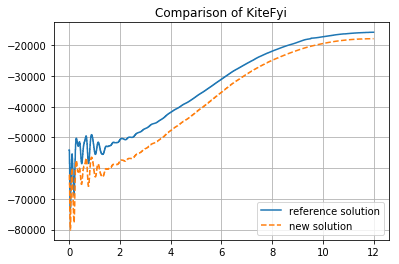

In [9]:
#plot certain channels if needed for further analysis
import matplotlib.pyplot as plt

#define name of the quantity you would like to plot
chan_name='KiteFyi'

time_old=ref_data['Time']
time_new=new_data['Time']

y_vals_old=ref_data[chan_name]
y_vals_new=new_data[chan_name]

plt.plot(time_old,y_vals_old,label='reference solution')
plt.plot(time_new[0:int(end_ind_new[0])+2],y_vals_new[0:int(end_ind_new[0])+2],'--',label='new solution')
plt.legend(loc='lower right')
plt.title('Comparison of %s' %chan_name)
plt.grid()
plt.show()